# sklearn.model_selection.**StratifiedKFold**

* provides train/test indicess to split data in train/test sets
* the foldes are made by preserving the percentage of samples for each class

## parameters

* n_splits : number of folds

* shuffle : wherher to shuffle each class's samples before splitting into batches
    - note that the samples within each split wii not be shuffled
    
* random_state : when shuffle is True   
    it affects the ordering of the indices, which controls the randomness of each fold for each class

## method

* get_n_splits(): return the number of splitting iterations in cross-validation

* split() : generate indices to split data into training and test set

In [3]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# 동일한 class 분포를 포함한 test set을 생성한다
X= np.array([[1,2],[3,4],[1,2],[3,4]])
y= np.array([0,0,1,1]) #class label은 변하면 안됨, label을 다시 지정했을 때, 생성된 index가 변경되면 안됨

skf=StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

2

In [4]:
# shuffle=False : 일부 test set에서 k class의 모든 sample은 y에 연속적이거나, k가 아닌 class의 sample에 의해 y로 분리된다.
print(skf)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


In [12]:
for train_index, test_index in skf.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [1 3] Test: [0 2]
Train: [0 2] Test: [1 3]


In [14]:
print(X_train, y_train)
print(X_test, y_test)

[[1 2]
 [1 2]] [0 1]
[[3 4]
 [3 4]] [0 1]


## 예제 1. '분류 score의 유의성'을 순열로 검사하기

* 분류 score가 유의한지 test하기 위해, label을 무작위화하고 순열로 배치한 뒤 분류 절차를 반복하는 과정   
    - p-value는 획득한 점수가 처음에 얻은 분류score보다 큰 작업의 백분율로 제공된다

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets

In [164]:
digits=datasets.load_digits()
X,y = digits.data, digits.target
n_classes=np.unique(y).size # array의 고유 indices size


#random하게 X shuffle
random = np.random.RandomState(seed=0) 
E=random.normal(size=(len(X),2200))

X=np.c_[X,E] #array 모양을 전치한후 쌓음


### permutation_test_score
permute(순열)을 사용해 cross-validation된 score의 유의성 평가

parameter
* estimator : data를 fit할 object
* scoring : test set을 예측,평가하기 위한 single str 또는 a callable
* cv : cross-validation splitting 방식을 결정
    - input이 int/None인 경우 estimator가 cassifier로 지정되고, y가 binary거나 multiclass인 경우 stratifiedKFold가 사용된다
* n_permutation : y를 permute할 횟수
* n_jobs : number of CPUs to do the computation


return
* score : permuting없이 내린 true score
* permutation_scores : 각 permute에 대해 얻은 score
* pvalue : score가 우연히 획득 될 확률
    - (c+1)/(n_permutations+1)
    - c는 permutation score>= score인 permutation의 수

In [165]:
svm= SVC(kernel='linear')
cv=StratifiedKFold(2)

score,permutation_scores, pvalue = permutation_test_score(svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)
print("Classification score %s (pvalue : %s)"%(score,pvalue))

Classification score 0.9337819056561237 (pvalue : 0.009900990099009901)


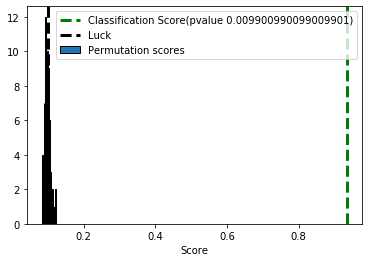

In [166]:
plt.hist(permutation_scores, 20, label='Permutation scores', edgecolor='black')
ylim=plt.ylim()
plt.plot(2*[score], ylim, '--g', linewidth=3, label='Classification Score''(pvalue %s)'%pvalue )
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

-------------------------------
# sklearn.model_selection.**train_test_split**

## parameters
* arrays : allowed input are lists,numpy array, scipy-sparse matrices or pandas dataframes

* test_size : should be  between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
    - int -> represents the absolute number of test samples
    - None -> the value is set to the complement of the train size (if train size=0, wii be set to 0.25)

* train_size : should be  between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
    - int -> represents the absolute number of test samples
    - None -> the value is set to the complement of the test size

* random_state : controls te shuffling applied to the data before applying the split

* shuffle : whether or not to shuffle before splitting

* stratify : if not None, data is split in a stratified fashion, using this as the class labels.

## returns : 
    splitting : list contaning train-test split of inputs

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

X,y=np.arange(10).reshape((5,2)), range(5)

In [26]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [28]:
list(y)

[0, 1, 2, 3, 4]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=40)

In [32]:
X_train

array([[2, 3],
       [8, 9],
       [6, 7]])

In [33]:
y_train

[1, 4, 3]

In [34]:
X_test

array([[4, 5],
       [0, 1]])

In [36]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

## 예제2. 손으로 쓴 숫자 인식하기

In [37]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [43]:
digits=datasets.load_digits()

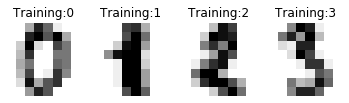

In [137]:
# Look for first 4 imasges

#subplot(nrows, ncols): single Axes나 array Axes를 가진 figure(subplot grid) 출력
_, axes = plt.subplots(1, 4)
images_and_labels=list(zip(digits.images,digits.target)) 
for ax, (image, label) in zip(axes[:4],images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training:%i'%label) # 'Training:image의 label'로 title 설정

In [121]:
# 분류를 위해서, image data를 (sample, feature) matrix로 변환

n_samples = len(digits.images) 
data=digits.images.reshape((n_samples, -1)) #data.shape=(1797,64)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
# shuffle 없이 test set, train set 비율을 0.5로 각각 (data, digits.target)을 분리함

In [124]:
classifier=svm.SVC(gamma=0.001)

#train set으로 분류기 훈련시키기
classifier.fit(X_train, y_train)
# test set label 예측
predicted= classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2 :], predicted)) #shuffle을 안했기 떄문에 images set 절반이 test set

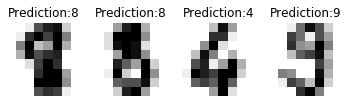

In [139]:
_, axes = plt.subplots(1, 4)
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction:%i'%prediction)


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

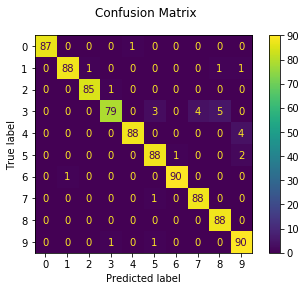

In [141]:
print("Classification report for classifier %s:\n%s\n"%(classifier, metrics.classification_report(y_test,predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s"%disp.confusion_matrix)

plt.show()